<a href="https://colab.research.google.com/github/julopezrio/TAM/blob/main/tareaTam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vector u: [1.76405235 0.40015721]
Vector v: [0.97873798 2.2408932 ]
Proyección de u sobre v: [0.42937802 0.98309282]
α óptimo (analítico): 0.4387057913746136
α encontrado por gradiente descendente: 0.43870576167880715


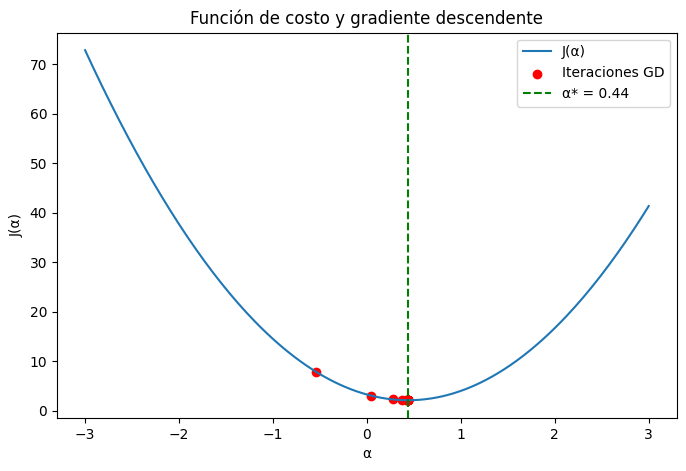

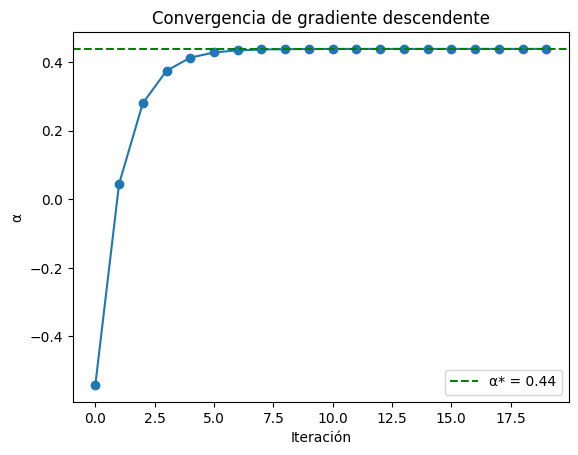

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Generamos dos vectores aleatorios en R^2 ---
np.random.seed(0)  # reproducible
u = np.random.randn(2)
v = np.random.randn(2)

print("Vector u:", u)
print("Vector v:", v)

# --- 2. Proyección de u sobre v ---
proj_u_on_v = (np.dot(u, v) / np.dot(v, v)) * v
print("Proyección de u sobre v:", proj_u_on_v)

# --- 3. Solución analítica ---
alpha_opt = np.dot(u, v) / np.dot(v, v)
print("α óptimo (analítico):", alpha_opt)

# --- 4. Función de costo J(alpha) ---
def cost(alpha):
    return np.linalg.norm(u - alpha * v)**2

alphas = np.linspace(-3, 3, 200)
costs = [cost(a) for a in alphas]

# --- 5. Gradiente descendente ---
def grad(alpha):
    return -2*np.dot(u, v) + 2*alpha*np.dot(v, v)

alpha = -2.0   # inicialización
eta = 0.05     # tasa de aprendizaje
history = []
cost_history = []

for i in range(20):
    alpha = alpha - eta * grad(alpha)
    history.append(alpha)
    cost_history.append(cost(alpha))

print("α encontrado por gradiente descendente:", alpha)

# --- 6. Gráfica de la función de costo con el descenso ---
plt.figure(figsize=(8,5))
plt.plot(alphas, costs, label="J(α)")
plt.scatter(history, cost_history, c='red', marker='o', label="Iteraciones GD")
plt.axvline(alpha_opt, color="green", linestyle="--", label=f"α* = {alpha_opt:.2f}")
plt.xlabel("α")
plt.ylabel("J(α)")
plt.title("Función de costo y gradiente descendente")
plt.legend()
plt.show()

# --- 7. Gráfica de convergencia de α ---
plt.plot(history, marker="o")
plt.axhline(alpha_opt, color="green", linestyle="--", label=f"α* = {alpha_opt:.2f}")
plt.xlabel("Iteración")
plt.ylabel("α")
plt.title("Convergencia de gradiente descendente")
plt.legend()
plt.show()


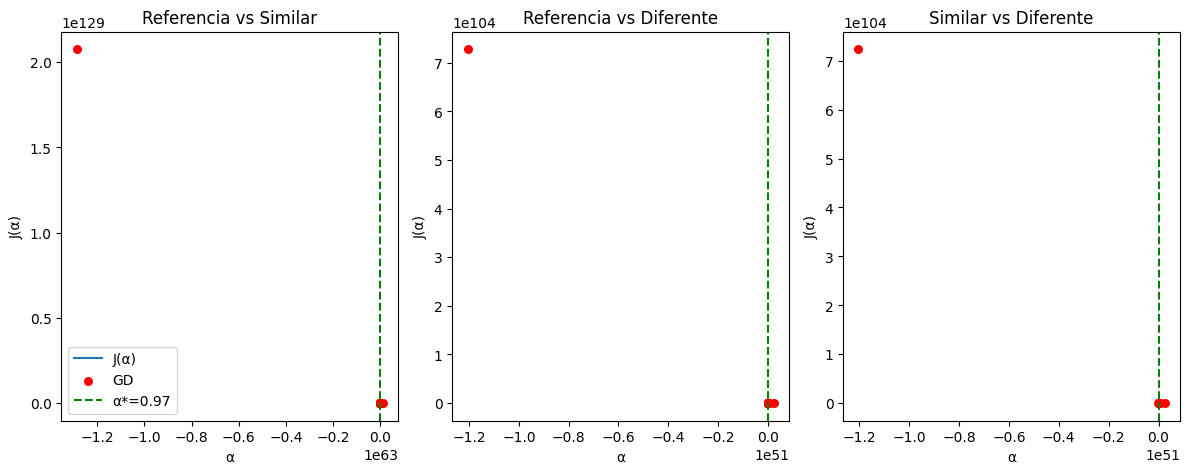

               Comparación  Distancia Euclídea  Similitud Coseno  α óptimo
0    Referencia vs Similar           13.927154          0.926437  0.965109
1  Referencia vs Diferente           21.904319          0.836266  1.378202
2     Similar vs Diferente           19.490196          0.866929  1.371486


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# --- 1. Función para cargar y vectorizar imágenes ---
def img_to_vector(path, size=(64,64)):
    img = Image.open(path).convert("L").resize(size)  # escala de grises y redimensionar
    return np.array(img).flatten() / 255.0           # normalización a [0,1]

# --- 2. Cargar imágenes (ejemplo: sube tus imágenes a Colab) ---
# Usa tus propios paths o súbelas en Colab
img_ref = img_to_vector("/content/WhatsApp Image 2025-09-02 at 22.12.03.jpeg")
img_similar = img_to_vector("/content/WhatsApp Image 2025-09-02 at 22.12.03 (1).jpeg")
img_diff = img_to_vector("/content/5a3ee2e4-f080-42df-8573-473cd61d70b7.jpeg")

# --- 3. Definir función de costo J(alpha) ---
def cost(alpha, u, v):
    return np.linalg.norm(u - alpha*v)**2

def grad(alpha, u, v):
    return -2*np.dot(u, v) + 2*alpha*np.dot(v, v)

def solve_gradient_descent(u, v, alpha0=-2.0, eta=0.01, iters=100):
    alpha = alpha0
    history, cost_history = [], []
    for _ in range(iters):
        alpha = alpha - eta * grad(alpha, u, v)
        history.append(alpha)
        cost_history.append(cost(alpha, u, v))
    return history, cost_history

# --- 4. Métricas de similitud ---
def euclidean_distance(u, v):
    return np.linalg.norm(u - v)

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

# --- 5. Experimento: comparar imágenes ---
pairs = {
    "Referencia vs Similar": (img_ref, img_similar),
    "Referencia vs Diferente": (img_ref, img_diff),
    "Similar vs Diferente": (img_similar, img_diff)
}

results = []

plt.figure(figsize=(12,5))
for i, (name, (u, v)) in enumerate(pairs.items(), 1):
    # Solución analítica
    alpha_opt = np.dot(u, v) / np.dot(v, v)

    # Rango para graficar
    alphas = np.linspace(-1, 3, 100)
    costs = [cost(a, u, v) for a in alphas]

    # Gradiente descendente
    history, cost_history = solve_gradient_descent(u, v, alpha0=-1, eta=0.05, iters=30)

    # Gráfica costo
    plt.subplot(1,3,i)
    plt.plot(alphas, costs, label="J(α)")
    plt.scatter(history, cost_history, c='red', marker='o', s=30, label="GD")
    plt.axvline(alpha_opt, color="green", linestyle="--", label=f"α*={alpha_opt:.2f}")
    plt.title(name)
    plt.xlabel("α")
    plt.ylabel("J(α)")
    if i == 1: plt.legend()

    # Métricas
    dist = euclidean_distance(u, v)
    cos = cosine_similarity(u, v)
    results.append([name, dist, cos, alpha_opt])

plt.tight_layout()
plt.show()

# --- 6. Resultados en tabla ---
df = pd.DataFrame(results, columns=["Comparación", "Distancia Euclídea", "Similitud Coseno", "α óptimo"])
print(df)


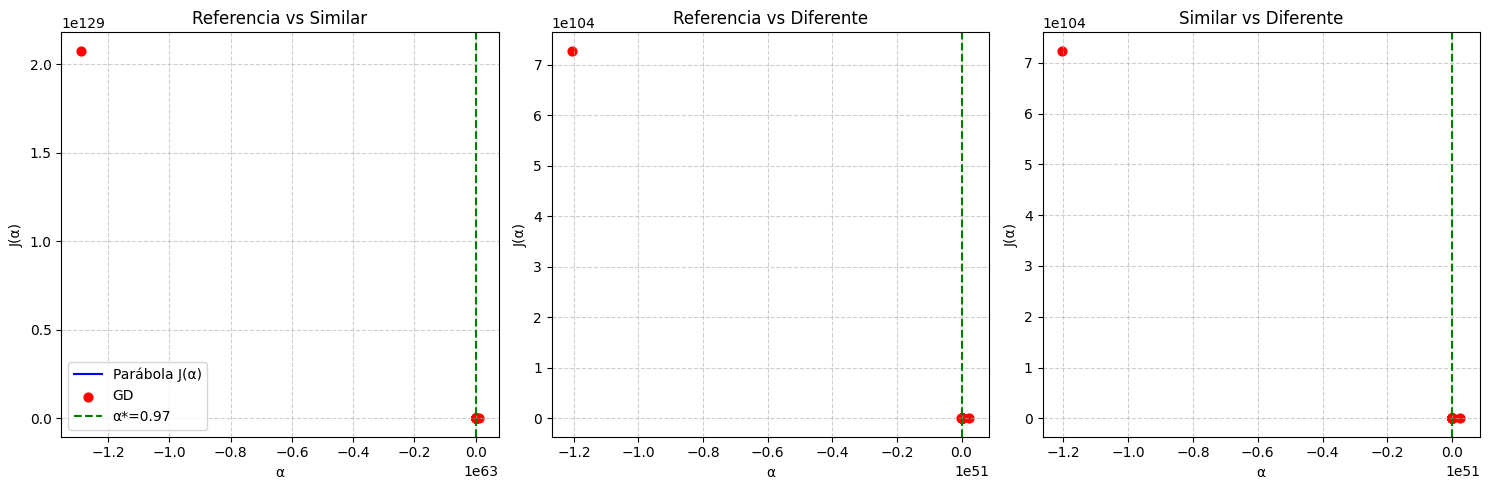

               Comparación  Distancia Euclídea  Similitud Coseno  α óptimo
0    Referencia vs Similar           13.927154          0.926437  0.965109
1  Referencia vs Diferente           21.904319          0.836266  1.378202
2     Similar vs Diferente           19.490196          0.866929  1.371486


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# --- 1. Función para cargar y vectorizar imágenes ---
def img_to_vector(path, size=(64,64)):
    img = Image.open(path).convert("L").resize(size)  # escala de grises y redimensionar
    return np.array(img).flatten() / 255.0           # normalización a [0,1]

# --- 2. Cargar imágenes (ejemplo: sube tus imágenes a Colab) ---
# Usa tus propios paths o súbelas en Colab
img_ref = img_to_vector("/content/WhatsApp Image 2025-09-02 at 22.12.03.jpeg")
img_similar = img_to_vector("/content/WhatsApp Image 2025-09-02 at 22.12.03 (1).jpeg")
img_diff = img_to_vector("/content/5a3ee2e4-f080-42df-8573-473cd61d70b7.jpeg")

# --- 3. Definir función de costo J(alpha) ---
def cost(alpha, u, v):
    return np.linalg.norm(u - alpha*v)**2

def grad(alpha, u, v):
    return -2*np.dot(u, v) + 2*alpha*np.dot(v, v)

def solve_gradient_descent(u, v, alpha0=-2.0, eta=0.01, iters=50):
    alpha = alpha0
    history, cost_history = [], []
    for _ in range(iters):
        alpha = alpha - eta * grad(alpha, u, v)
        history.append(alpha)
        cost_history.append(cost(alpha, u, v))
    return history, cost_history

# --- 4. Métricas de similitud ---
def euclidean_distance(u, v):
    return np.linalg.norm(u - v)

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

# --- 5. Experimento: comparar imágenes ---
pairs = {
    "Referencia vs Similar": (img_ref, img_similar),
    "Referencia vs Diferente": (img_ref, img_diff),
    "Similar vs Diferente": (img_similar, img_diff)
}

results = []

plt.figure(figsize=(15,5))
for i, (name, (u, v)) in enumerate(pairs.items(), 1):
    # Solución analítica
    alpha_opt = np.dot(u, v) / np.dot(v, v)

    # Rango para graficar (más amplio para ver parábola completa)
    alphas = np.linspace(-2, 3, 200)
    costs = [cost(a, u, v) for a in alphas]

    # Gradiente descendente
    history, cost_history = solve_gradient_descent(u, v, alpha0=-1, eta=0.05, iters=30)

    # --- Gráfica parabólica ---
    plt.subplot(1,3,i)
    plt.plot(alphas, costs, label="Parábola J(α)", color="blue")
    plt.scatter(history, cost_history, c='red', marker='o', s=40, label="GD")
    plt.axvline(alpha_opt, color="green", linestyle="--", label=f"α*={alpha_opt:.2f}")
    plt.title(name)
    plt.xlabel("α")
    plt.ylabel("J(α)")
    plt.grid(True, linestyle="--", alpha=0.6)
    if i == 1:
        plt.legend()

    # Guardamos resultados
    dist = euclidean_distance(u, v)
    cos = cosine_similarity(u, v)
    results.append([name, dist, cos, alpha_opt])

plt.tight_layout()
plt.show()

# --- 6. Resultados en tabla ---
df = pd.DataFrame(results, columns=["Comparación", "Distancia Euclídea", "Similitud Coseno", "α óptimo"])
print(df)
